This example shows a low-pass RC Filter.


In [1]:


import math
import numpy as np
import matplotlib.pyplot as plt


import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()


from PySpice.Plot.BodeDiagram import bode_diagram
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *




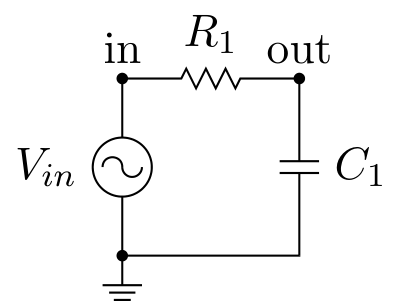

In [2]:

circuit = Circuit('Low-Pass RC Filter')

circuit.SinusoidalVoltageSource('input', 'in', circuit.gnd, amplitude=1@u_V)
R1 = circuit.R(1, 'in', 'out', 1@u_kΩ)
C1 = circuit.C(1, 'out', circuit.gnd, 1@u_uF)



2023-12-28 01:09:53,372 - PySpice.Spice.Netlist.Node - Netlist.WARNING - Node name 'in' is a Python keyword


The break frequency is given by $f_c = \frac{1}{2 \pi R C}$


In [3]:

break_frequency = 1 / (2 * math.pi * float(R1.resistance * C1.capacitance))
print("Break frequency = {:.1f} Hz".format(break_frequency))


Break frequency = 159.2 Hz


In [4]:

simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.ac(start_frequency=1@u_Hz, stop_frequency=1@u_MHz, number_of_points=10,  variation='dec')
# print(analysis.out)



We plot the Bode diagram.


2023-12-28 01:09:53,512 - PySpice.Probe.WaveForm.WaveForm - Unit.WARNING - Should be unit less
2023-12-28 01:09:53,513 - PySpice.Probe.WaveForm.WaveForm - Unit.WARNING - Should be unit less


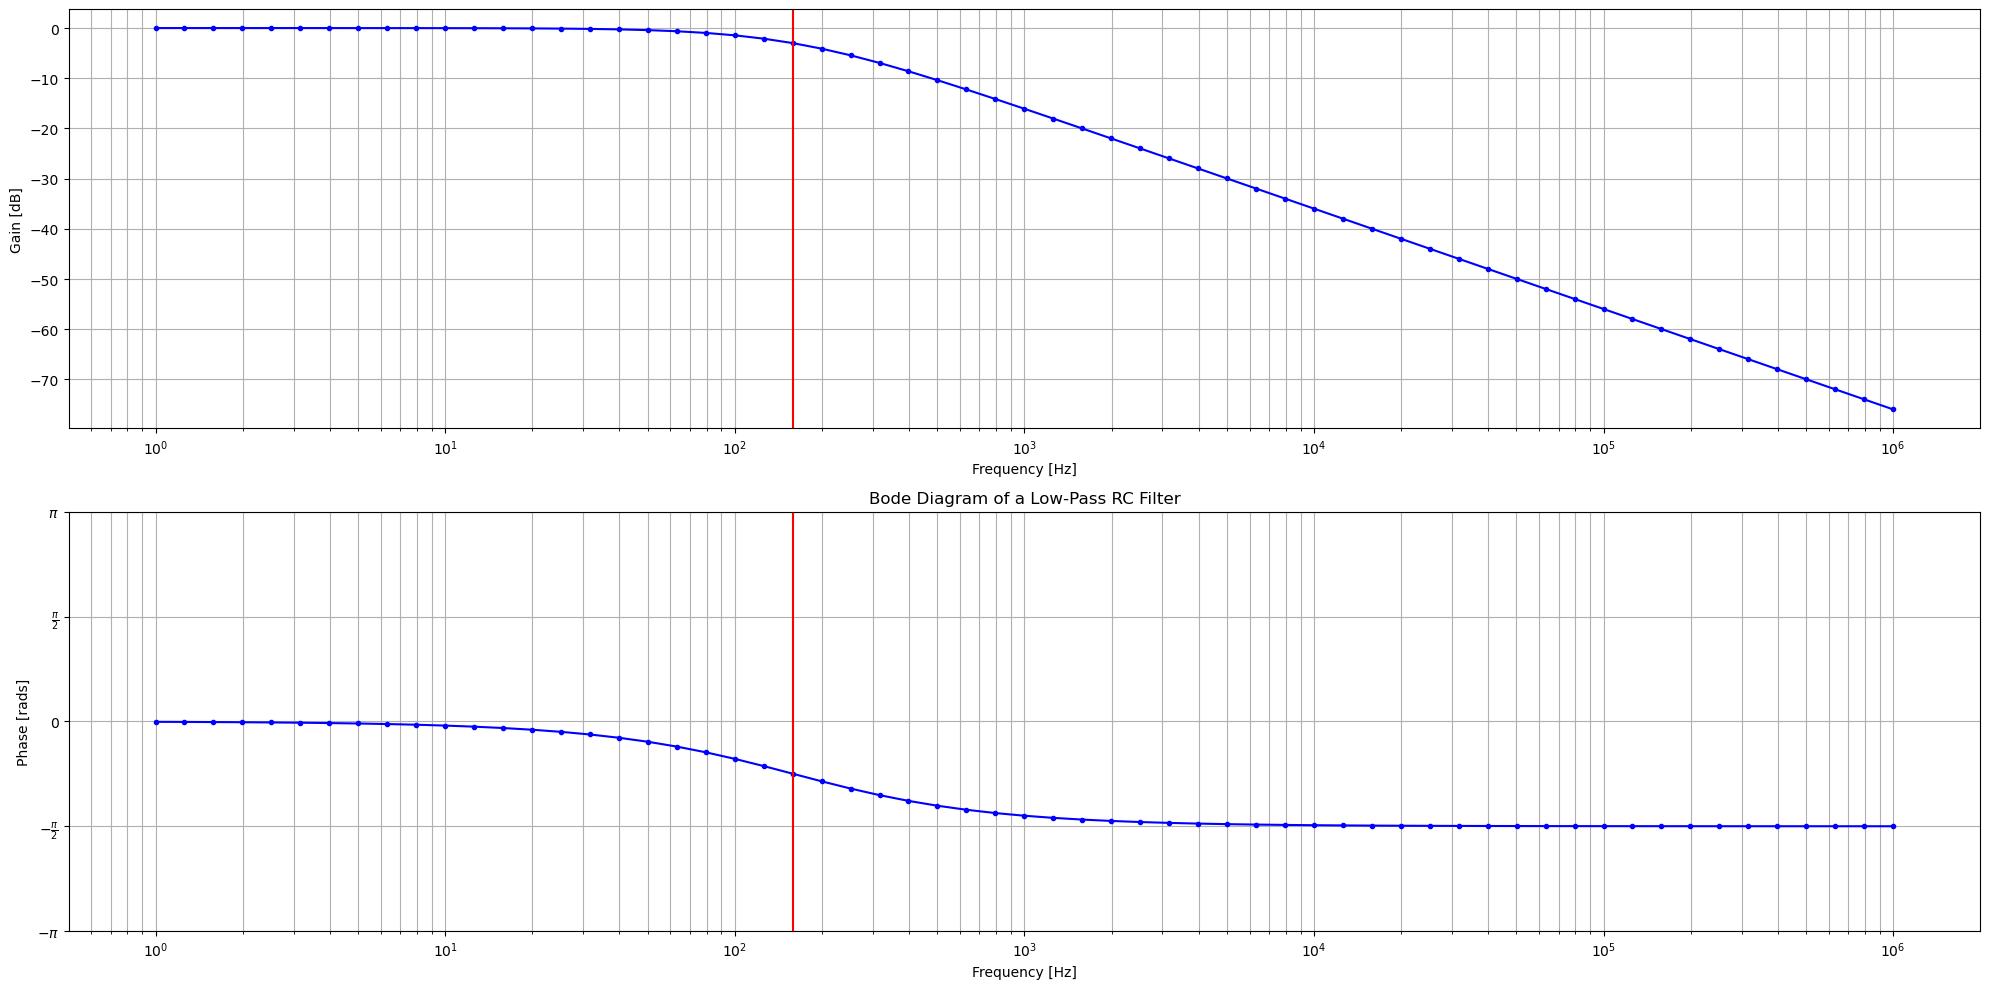

In [5]:

figure, axes = plt.subplots(2, figsize=(20, 10))
plt.title("Bode Diagram of a Low-Pass RC Filter")
bode_diagram(axes=axes,
             frequency=analysis.frequency,
             gain=20*np.log10(np.absolute(analysis.out)),
             phase=np.angle(analysis.out, deg=False),
             marker='.',
             color='blue',
             linestyle='-',
)
for ax in axes:
    ax.axvline(x=break_frequency, color='red')

plt.tight_layout()

